In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import random
import glob
import os  # You need to ensure 'os' is imported for directory checks

# Load all images from the dataset (Mango folder) using glob
data_df = [
    f for f in glob.glob('/content/drive/MyDrive/leaf1/tomato' + "/**/*", recursive=True)
    if not os.path.isdir(f)
]

# Check the number of files loaded
print(f"Total files loaded: {len(data_df)}")

Total files loaded: 2000


In [27]:
len(data_df)

2000

In [28]:
import numpy as np #this module is for array operations
import cv2 #use for image processing and computer vision
import os
from PIL import Image, ImageEnhance, ImageFilter, ImageOps #for image processing
import warnings
import random
warnings.filterwarnings('ignore') #for removing the all warnings
import tensorflow as tf #for machine learning
import matplotlib.pyplot as plt #it is for data visualizations
import glob #for loading the data
from skimage.feature import hog


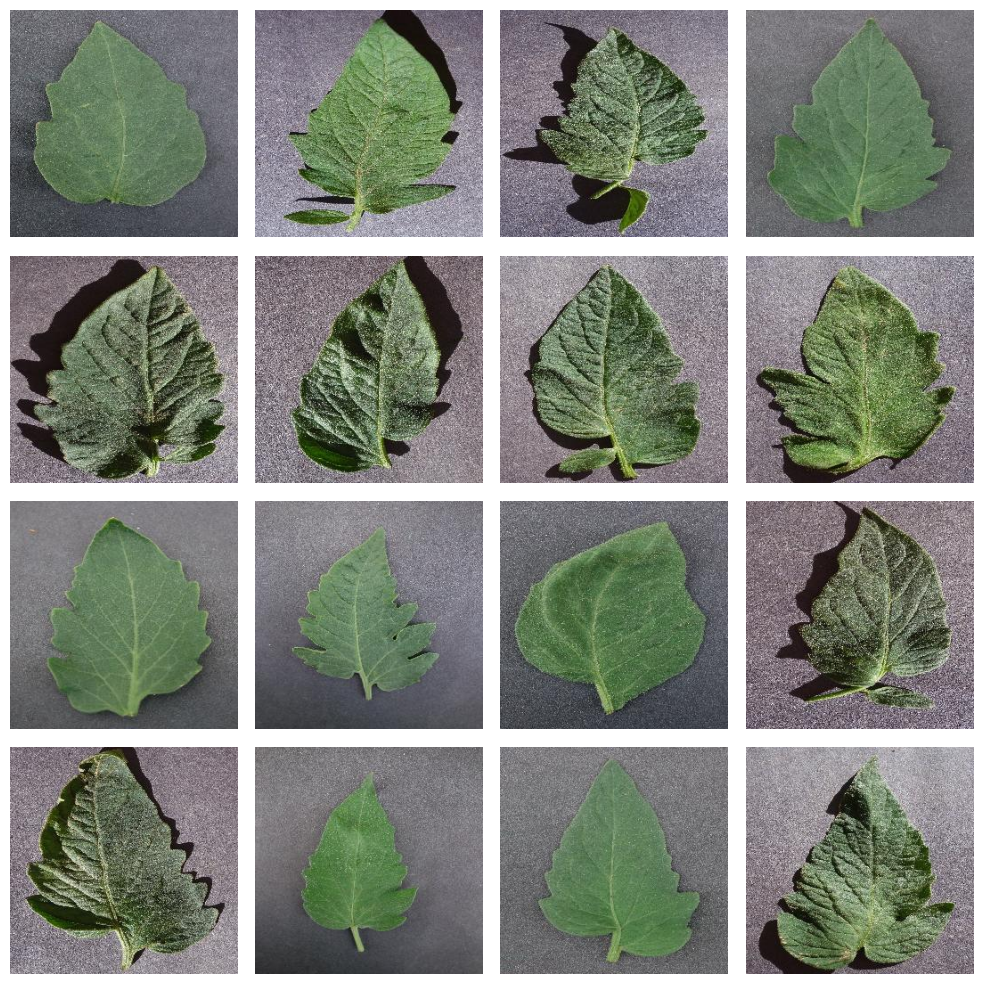

In [29]:
plt.figure(figsize=(10,10))  # Create a figure of size 10x10 inches

# Loop to display the first 16 images from data_df
for i in range(min(16, len(data_df))):  # Ensuring there are at least 16 images
    plt.subplot(4, 4, i + 1)  # Create a 4x4 grid of subplots
    img = cv2.imread(data_df[i])  # Read the image

    if img is not None:  # Check if the image was successfully loaded
        img_r = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display
        plt.imshow(img_r)  # Display the image
    else:
        print(f"Warning: Could not load image at {data_df[i]}")  # Print warning for missing/invalid images

    plt.axis("off")  # Turn off axis labels

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()  # Display the figure

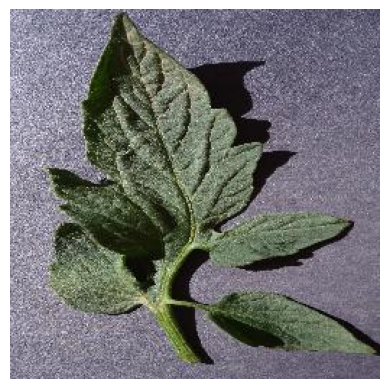

In [30]:
# Load a sample image from the dataset
img = cv2.imread(data_df[100])

# Check if the image was successfully loaded
if img is not None:
    # Convert the image from BGR to RGB for correct color display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')  # Turn off the axis
    plt.show()  # Show the image
else:
    print("Error: Could not load image at data_df[100]")

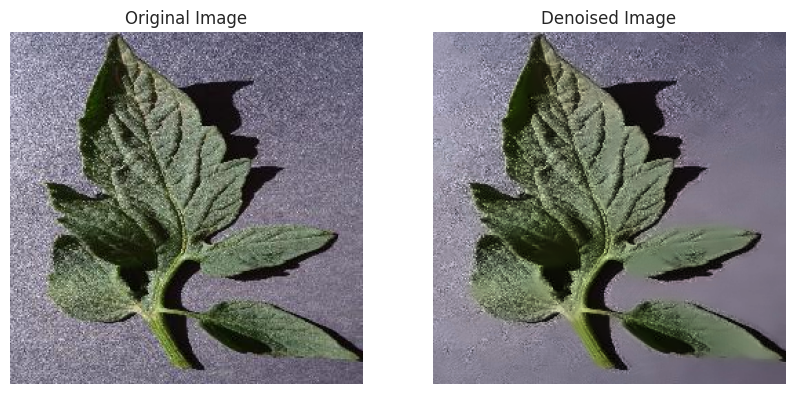

In [31]:
# Import necessary modules
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load the image from the dataset
img = cv2.imread(data_df[100])

# Check if the image was successfully loaded
if img is not None:
    # Apply fast Non-Local Means Denoising (for colored images)
    dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15)

    # Convert images from BGR to RGB for correct display in matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    dst_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

    # Display original and denoised images side by side
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(img_rgb)
    plt.axis('off')
    plt.title('Original Image')

    plt.subplot(122), plt.imshow(dst_rgb)
    plt.axis('off')
    plt.title('Denoised Image')

    plt.show()
else:
    print("Error: Could not load image at data_df[100]")

In [32]:
name = []
for i in range(len(data_df)):
    name.append(data_df[i].split(os.path.sep)[-2])

In [33]:
name = set(name)

In [34]:
name

{'diseased', 'healthy'}

In [ ]:
# Loading, resizing, and labeling images
import os
import cv2
from tqdm import tqdm

data = []
labels = []

for i in tqdm(range(len(data_df))):
    img = cv2.imread(data_df[i])  # Read image

    # Check if the image is loaded properly and is a color image
    if img is not None and img.shape[-1] == 3:  # Ensure it's a 3-channel image (RGB/BGR)
        img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15)  # Denoise image
        img = cv2.resize(img, (90, 90))  # Resize image
        data.append(img)

        # Extract label from the folder name
        lbls = data_df[i].split(os.path.sep)[-2]  # Assuming path is something like "path/to/plant_category/image.jpg"

        # Assign numerical labels based on the plant health status
        plant_dict = {
            'diseased': 0,
            'healthy': 1,
        }

        lbl = plant_dict.get(lbls, -1)  # Default to -1 if the label is not found
        labels.append(lbl)
    else:
        print(f"Skipping file {data_df[i]}: Image not loaded correctly or is not a color image.")

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train_resized)

100%|██████████| 2000/2000 [04:57<00:00,  6.72it/s]


In [36]:
#lables and name stored in array
leaf_images = np.array(data)
labels =  np.array(labels).reshape(len(labels),)


In [37]:
# split dataset for training and validation
from sklearn.model_selection import train_test_split
(X_train, X_test, Y_train, Y_test) = train_test_split(leaf_images, labels, test_size=0.2, random_state=42)

In [38]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1600, 90, 90, 3) (1600,)
(400, 90, 90, 3) (400,)


In [39]:
# Normalising pixel value
X_train = X_train / 255.0
X_test = X_test / 255.0

In [40]:
# Model imports
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import xgboost as xgb  # Add XGBoost import here

# Metrics import
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [41]:
# Reshape the data
X_train_flattened = X_train.reshape(X_train.shape[0], -1)  # (240, 90*90*3)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)  # (60, 90*90*3)

In [42]:
from sklearn.preprocessing import StandardScaler
import xgboost as xgb  # Ensure you have this import for XGBoost

# Normalize input data
scaler = StandardScaler()
X_train_flattened_scaled = scaler.fit_transform(X_train_flattened)
X_test_flattened_scaled = scaler.transform(X_test_flattened)

# Create an XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    n_estimators=100,  # You can adjust the number of estimators
)

# Fit the model with scaled data
%time xgb_model.fit(X_train_flattened_scaled, Y_train)


CPU times: user 2min 55s, sys: 6.46 s, total: 3min 1s
Wall time: 1min 58s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [43]:
# basic imports
import numpy as np
import pandas as pd
import os

# plotting imports
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
sns.set()

In [44]:
# this function takes any model and evaluates it against both training set and dataset
# it prints the following:
#  1. Accuracy Score against trainning set
#  2. Classification report against training set
#  3. Accuracy Score against test set
#  4. Classification report against test set
#  5. Confusion matrix against test set
def evaluate_model(name, model):
    # predict using the trained model against training dataset
    y_predict_train = model.predict(X_train_flattened_scaled)

    # predict using the trained model against test dataset
    y_predict_test = model.predict(X_test_flattened_scaled)

    print("Evaluating Model: " + name)
    print("")

    print("1. Accuracy Score (training set) for " + name)
    print(accuracy_score(Y_train, y_predict_train))
    print("")

    print("2. Classification Report (training set) for " + name)
    print(classification_report(Y_train, y_predict_train))
    print("")

    print("3. Accuracy Score (test set) for " + name)
    print(accuracy_score(Y_test, y_predict_test))
    print("")

    print("4. Classification Report (test set) for " + name)
    print(classification_report(Y_test, y_predict_test))
    print("")

    print("5. Confusion Matrix for model: " + name)
    cmap = sns.cubehelix_palette(light= 0.9, as_cmap=True)
    cm = confusion_matrix(Y_test, y_predict_test)
    sns.heatmap(cm.T, square = True, annot=True, fmt='d', cbar=False,
               xticklabels=['diseased', 'Healthy'],
               yticklabels=['diseased', 'Healthy'], cmap=cmap)

    plt.xlabel('True label', size=12)
    plt.ylabel('Predicted label', size=12)
    plt.title('Confusion matrix for model: ' + name)

Evaluating Model: XGBoost

1. Accuracy Score (training set) for XGBoost
1.0

2. Classification Report (training set) for XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       799
           1       1.00      1.00      1.00       801

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600


3. Accuracy Score (test set) for XGBoost
0.9725

4. Classification Report (test set) for XGBoost
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       201
           1       0.96      0.98      0.97       199

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400


5. Confusion Matrix for model: XGBoost


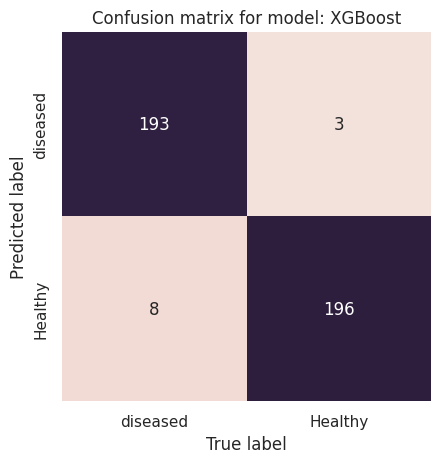

In [45]:


# Define and train the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    n_estimators=100,  # You can adjust the number of estimators
)

xgb_model.fit(X_train_flattened_scaled, Y_train)

# Evaluate the model
evaluate_model('XGBoost', xgb_model)


In [46]:
import cv2
import numpy as np

def test_model(image_path, model, scaler):
    # Read the image
    img = cv2.imread(image_path)

    # Resize the image to match the input size of the model
    img_resized = cv2.resize(img, (90, 90))  # Resize to (90, 90)

    # Normalize the pixel values
    img_normalized = img_resized / 255.0

    # Flatten the image to match the model input
    img_flattened = img_normalized.reshape(1, -1)  # Shape (1, 90*90*3)

    # Scale the flattened image using the same scaler
    img_scaled = scaler.transform(img_flattened)

    # Make a prediction
    prediction = model.predict(img_scaled)

    # Map the prediction back to class names
    plant_dict = {0: 'diseased', 1: 'healthy'}

    # Output the prediction
    print(f'The model predicts that the plant is: {plant_dict.get(prediction[0])}')


In [48]:

# Path to the new leaf image (replace with the actual path of the new image)
new_image_path = '/content/drive/MyDrive/leaf1/tomato/healthy/003944fc-3b99-4a0f-9ed4-0e07352fd8b3___RS_HL 9844.JPG'

# Test the model with the new image
test_model(new_image_path, xgb_model, scaler)  # Use xgb_model instead of mlp_model



The model predicts that the plant is: healthy
